0
[[-0.9 -0.9 -1.7  0. ]
 [ 0.   0.  -0.9  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [-0.9 -1.  -1.7 -0.9]
 [-0.9  0.  -1.   0. ]
 [-0.9 -0.9  0.   0. ]
 [-0.9 -1.   0.   0. ]
 [-1.  -0.9 -0.9  0. ]
 [-0.9  0.   0.   0. ]
 [-1.  -1.  -1.  -1. ]
 [-1.9 -1.  -1.8 -0.9]
 [-0.9 -1.   0.  -0.9]
 [-0.9 -0.9 -0.9 -0.9]
 [-0.9 -0.9  0.   0. ]
 [ 0.   0.  -0.9  0. ]
 [-1.8 -1.  -0.9 -0.9]
 [-1.7 -1.  -0.9 -1.9]
 [-1.7 -0.9 -0.9 -0.9]
 [-1.   0.   0.  -0.9]
 [-0.9  0.   0.   0. ]
 [-0.9  0.   0.   0. ]
 [-0.9 -0.9 -1.8 -0.9]
 [-0.9 -0.9 -0.9 -0.9]
 [-0.9  0.  -0.9  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [-0.9 -0.9 -1.  -1. ]
 [-0.9  0.   0.  -0.9]
 [ 0.   9.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]
0
[[-0.9 -0.9 -1.7  0. ]
 [ 0.   0.  -0.9  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [-0.9 -1.  -1.7 -0.9]
 [-0.9

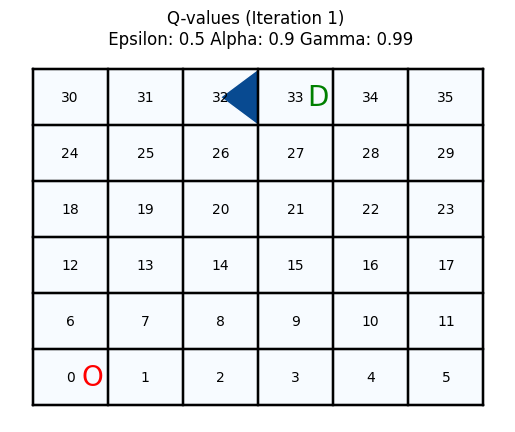

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize



# Grid Setup
GRID_SIZE = 10
START_STATE = 0  # Home
GOAL_STATE = 33  # Room 9

# Actions
ACTIONS = ['left', 'right', 'up', 'down']

# Rewards (Modify as you like)
STANDARD_REWARD = -1
GOAL_REWARD = 10.0
OBSTACLE_REWARD = 0

# Q-Learning parameters
ALPHA = 0.9 # Learning rate
GAMMA = 0.99  # Discount factor
EPSILON = 0.5  # Exploration rate

# Create Q-table (initialized with zeros)
Q = np.zeros((GRID_SIZE * GRID_SIZE, len(ACTIONS)))
# print(Q)

# Helper function for getting valid actions in a state
def valid_actions(state):
    return ACTIONS


# Helper function to move to the next state based on action
def next_state(state, action):
    if action == 'left':
        return state - 1 if state % GRID_SIZE != 0 else state
    if action == 'right':
        return state + 1 if state % GRID_SIZE != GRID_SIZE - 1 else state
    if action == 'up':
        return state + GRID_SIZE if state < GRID_SIZE * (GRID_SIZE - 1) else state
    if action == 'down':
        return state - GRID_SIZE if state >= GRID_SIZE else state

# Training loop
episodes = 5000
history = []  # Store the path for each episode
Qhistory = []  # Store the Q-table for each episode

for episode in range(episodes):
    state = START_STATE
    path = [state]  # Store the trajectory of the current episode

    while state != GOAL_STATE:
        if random.random() < EPSILON:  # Exploration
            action = random.choice(valid_actions(state))
        else:  # Exploitation
            action = ACTIONS[np.argmax(Q[state])]

        next_s = next_state(state, action)
        reward = STANDARD_REWARD

        if next_s == GOAL_STATE:
            reward = GOAL_REWARD
        # elif # (add condition for obstacle if you want):
        #     reward = OBSTACLE_REWARD

        Q[state, ACTIONS.index(action)] += ALPHA * (reward + GAMMA * np.max(Q[next_s]) - Q[state, ACTIONS.index(action)])
        # print(Q)
        state = next_s
        path.append(state)

    history.append(path)
    Qhistory.append(Q.copy())


# Visualization
fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    data = history[i]
    AS_V = Qhistory[i]
    # print(AS_V)
    # Create a colormap and normalize the values
    colormap = plt.cm.Blues
    norm = Normalize(vmin=0, vmax=GOAL_REWARD)
    if (i % 1000) == 0:
        print(i)
        # % print AS_V with one decimal. pretty print

        print(AS_V.round(1))
    ax.set_title(f'Q-values (Iteration {i + 1}) \n Epsilon: {EPSILON} Alpha: {ALPHA} Gamma: {GAMMA}')
    # turn off the axis
    ax.axis('off')



    # draw a 3x3 grid to represent the environment
    for x in range(GRID_SIZE + 1):
        for y in range(GRID_SIZE + 1):
            ax.plot([x, x], [0, GRID_SIZE], 'k-')
            ax.plot([0, GRID_SIZE], [y, y], 'k-')

            # draw a colored triangle on the right side of the each cell with vertex of center, center + (-0.5, -0.5), center + (-0.5, 0.5)
            if y < GRID_SIZE and x < GRID_SIZE:
                center = (x + 0.5, y + 0.5)
                ax.text(center[0], center[1], f'{y * GRID_SIZE + x}', ha='center', va='center')

                # add Start and Goal
                if y * GRID_SIZE + x == START_STATE:
                    ax.text(center[0]+0.3, center[1], 'O', ha='center', va='center',color='red', fontsize=20)
                if y * GRID_SIZE + x == GOAL_STATE:
                    ax.text(center[0]+0.3, center[1], 'D', ha='center', va='center', color='green', fontsize=20)


                state_action_values = AS_V[y * GRID_SIZE + x]
                # fill for left, right, up, down
                ax.fill([center[0], center[0] - 0.5, center[0] - 0.5, center[0]], [center[1], center[1] - 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[0])))

                ax.fill([center[0], center[0] + 0.5, center[0] + 0.5, center[0]], [center[1], center[1] - 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[1])))

                ax.fill([center[0], center[0] - 0.5, center[0] + 0.5, center[0]], [center[1], center[1] + 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[2])))

                ax.fill([center[0], center[0] - 0.5, center[0] + 0.5, center[0]], [center[1], center[1] - 0.5, center[1] - 0.5, center[1]], color=colormap(norm(state_action_values[3])))


ani = animation.FuncAnimation(fig, animate, frames=len(history), repeat=False)
# save the animation as an mp4. This requires ffmpeg or mencoder with resolution 300 dpi
ani.save('qlearning_Epsilon: {} Alpha: {} Gamma: {}.mp4'.format(EPSILON,ALPHA,GAMMA), writer='ffmpeg', fps=100, dpi=300)




0
0 [-0.9    -0.9    -1.7019  0.    ]
1 [ 0.   0.  -0.9  0. ]
2 [0. 0. 0. 0.]
3 [0. 0. 0. 0.]
4 [0. 0. 0. 0.]
5 [0. 0. 0. 0.]
6 [-0.9    -0.99   -1.7019 -0.9   ]
7 [-0.9     0.     -0.9999  0.    ]
8 [-0.9 -0.9  0.   0. ]
9 [-0.9   -0.999  0.     0.   ]
10 [-0.99 -0.9  -0.9   0.  ]
11 [-0.9  0.   0.   0. ]
12 [-0.99 -0.99 -0.99 -0.99]
13 [-1.88199 -0.99    -1.7919  -0.9    ]
14 [-0.9  -0.99  0.   -0.9 ]
15 [-0.9 -0.9 -0.9 -0.9]
16 [-0.9 -0.9  0.   0. ]
17 [ 0.   0.  -0.9  0. ]
18 [-1.7919 -0.99   -0.9    -0.9   ]
19 [-1.7019  -0.99    -0.9     -1.87209]
20 [-1.7019 -0.9    -0.9    -0.9   ]
21 [-0.99  0.    0.   -0.9 ]
22 [-0.9  0.   0.   0. ]
23 [-0.9  0.   0.   0. ]
24 [-0.9    -0.9    -1.7919 -0.9   ]
25 [-0.9 -0.9 -0.9 -0.9]
26 [-0.9  0.  -0.9  0. ]
27 [0. 0. 0. 0.]
28 [0. 0. 0. 0.]
29 [0. 0. 0. 0.]
30 [-0.9    -0.9    -0.9999 -0.99  ]
31 [-0.9  0.   0.  -0.9]
32 [0. 9. 0. 0.]
33 [0. 0. 0. 0.]
34 [0. 0. 0. 0.]
35 [0. 0. 0. 0.]


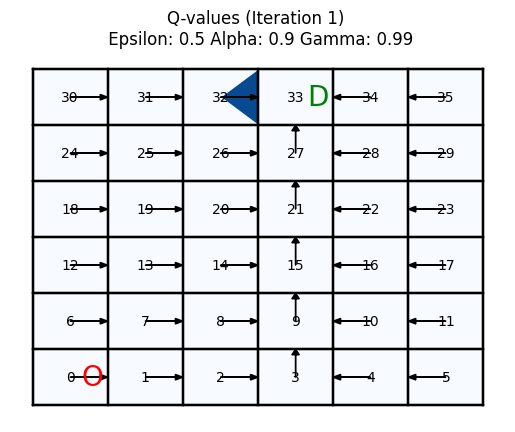

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
# draw the trajectory of the last episode starting from the start state to the goal state with arrows indicating the action taken at each state
i = 0
fig, ax = plt.subplots()
ax.clear()
data = history[i]
AS_V = Qhistory[i]
# print(AS_V)
# Create a colormap and normalize the values
colormap = plt.cm.Blues
norm = Normalize(vmin=0, vmax=GOAL_REWARD)
if (i % 1000) == 0:
    print(i)
    # % print AS_V with one decimal. pretty print
    for k in range(len(AS_V)):
        print(k, AS_V[k])

ax.set_title(f'Q-values (Iteration {i + 1}) \n Epsilon: {EPSILON} Alpha: {ALPHA} Gamma: {GAMMA}')
# turn off the axis
ax.axis('off')



# draw a  grid to represent the environment
for x in range(GRID_SIZE + 1):
    for y in range(GRID_SIZE + 1):
        ax.plot([x, x], [0, GRID_SIZE], 'k-')
        ax.plot([0, GRID_SIZE], [y, y], 'k-')

        # draw a colored triangle on the right side of the each cell with vertex of center, center + (-0.5, -0.5), center + (-0.5, 0.5)
        if y < GRID_SIZE and x < GRID_SIZE:
            center = (x + 0.5, y + 0.5)
            ax.text(center[0], center[1], f'{y * GRID_SIZE + x}', ha='center', va='center')

            # add Start and Goal
            if y * GRID_SIZE + x == START_STATE:
                ax.text(center[0]+0.3, center[1], 'O', ha='center', va='center',color='red', fontsize=20)
            if y * GRID_SIZE + x == GOAL_STATE:
                ax.text(center[0]+0.3, center[1], 'D', ha='center', va='center', color='green', fontsize=20)


            state_action_values = AS_V[y * GRID_SIZE + x]
            # fill for left, right, up, down
            ax.fill([center[0], center[0] - 0.5, center[0] - 0.5, center[0]], [center[1], center[1] - 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[0])))

            ax.fill([center[0], center[0] + 0.5, center[0] + 0.5, center[0]], [center[1], center[1] - 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[1])))

            ax.fill([center[0], center[0] - 0.5, center[0] + 0.5, center[0]], [center[1], center[1] + 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[2])))

            ax.fill([center[0], center[0] - 0.5, center[0] + 0.5, center[0]], [center[1], center[1] - 0.5, center[1] - 0.5, center[1]], color=colormap(norm(state_action_values[3])))

# draw the trajectory of best policy from start to goal
# Use only Q-values, do not use last episode history
# Use arrows to indicate the action for all states

for i in range(len(Q)):
    state = i
    if state != GOAL_STATE:
        action = ACTIONS[np.argmax(Q[state])]

        x = state % GRID_SIZE + 0.5
        y = state // GRID_SIZE + 0.5
        dx = 0
        dy = 0
        if action == 'left':
            dx = -0.4
        if action == 'right':
            dx = 0.4
        if action == 'up':
            dy = 0.4
        if action == 'down':
            dy = -0.4
        ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')
# save the JPG with 300 dpi
plt.savefig('qlearning_trajectory_Epsilon: {} Alpha: {} Gamma: {}.jpg'.format(EPSILON,ALPHA,GAMMA), dpi=300)

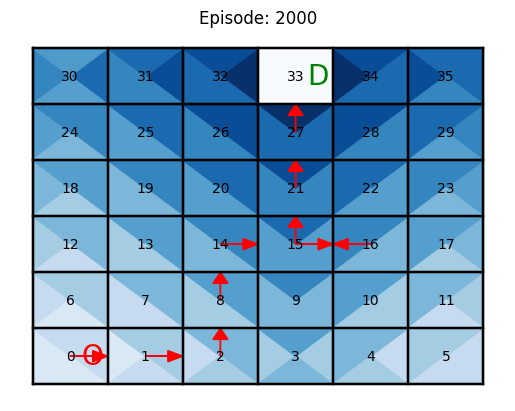

In [24]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
# draw the trajectory of the last episode starting from the start state to the goal state with arrows indicating the action taken at each state
j = 1999

def draw_ith_episode(i):
    fig, ax = plt.subplots()
    ax.clear()
    data = history[i]
    AS_V = Qhistory[i]
    # print(AS_V)
    # Create a colormap and normalize the values
    colormap = plt.cm.Blues
    norm = Normalize(vmin=0, vmax=GOAL_REWARD)
    if (i % 1000) == 0:
        print(i)
        # % print AS_V with one decimal. pretty print
        for k in range(len(AS_V)):
            print(k, AS_V[k])

    ax.set_title('Episode: {}'.format(i+1))
    # turn off the axis
    ax.axis('off')



    # draw a  grid to represent the environment
    for x in range(GRID_SIZE + 1):
        for y in range(GRID_SIZE + 1):
            ax.plot([x, x], [0, GRID_SIZE], 'k-')
            ax.plot([0, GRID_SIZE], [y, y], 'k-')

            # draw a colored triangle on the right side of the each cell with vertex of center, center + (-0.5, -0.5), center + (-0.5, 0.5)
            if y < GRID_SIZE and x < GRID_SIZE:
                center = (x + 0.5, y + 0.5)
                ax.text(center[0], center[1], f'{y * GRID_SIZE + x}', ha='center', va='center')

                # add Start and Goal
                if y * GRID_SIZE + x == START_STATE:
                    ax.text(center[0]+0.3, center[1], 'O', ha='center', va='center',color='red', fontsize=20)
                if y * GRID_SIZE + x == GOAL_STATE:
                    ax.text(center[0]+0.3, center[1], 'D', ha='center', va='center', color='green', fontsize=20)


                state_action_values = AS_V[y * GRID_SIZE + x]
                # fill for left, right, up, down
                ax.fill([center[0], center[0] - 0.5, center[0] - 0.5, center[0]], [center[1], center[1] - 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[0])))

                ax.fill([center[0], center[0] + 0.5, center[0] + 0.5, center[0]], [center[1], center[1] - 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[1])))

                ax.fill([center[0], center[0] - 0.5, center[0] + 0.5, center[0]], [center[1], center[1] + 0.5, center[1] + 0.5, center[1]], color=colormap(norm(state_action_values[2])))

                ax.fill([center[0], center[0] - 0.5, center[0] + 0.5, center[0]], [center[1], center[1] - 0.5, center[1] - 0.5, center[1]], color=colormap(norm(state_action_values[3])))

    # draw the trajectory of best policy from start to goal
    # Use only Q-values, do not use last episode history
    # Use arrows to indicate the action for all states

    trajectory = history[i]
    for j in range(len(trajectory) - 1):
            state = trajectory[j]
            next_state = trajectory[j + 1]

            x = state % GRID_SIZE + 0.5
            y = state // GRID_SIZE + 0.5
            dx = (next_state % GRID_SIZE - state % GRID_SIZE) * 0.5
            dy = (next_state // GRID_SIZE - state // GRID_SIZE) * 0.5

            ax.arrow(x, y, dx, dy, head_width=0.2, head_length=0.2, fc='r', ec='r', length_includes_head=True)

    # save the JPG with 300 dpi
    plt.savefig('Episode: {}.jpg'.format(i), dpi=300)

draw_ith_episode(j)

